# Proyecto del sprint 10
Se ha recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos de una tienda online. Mi trabajo es priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.
## Parte 1: priorizar hipótesis
Con los frameworks __ICE__ y __RICE__ vamos a organizar con base en prioridad las nueve hipótesis contenidas en el archivo ``hypotheses_us.csv``. El DataFrame se llamará ``hypothesis``. Primero vamos a familiarizarnos con él.

In [1]:
# Importaremos la bibliotecas necesarias por ahora.
import pandas as pd
from IPython.display import display

# El archivo necesita separarse por punto y coma.
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')

# Impresión de todo el DataFrame.
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


En este DataFrame tenemos contenidas las hipótesis y las métricas (reach, impact, confidence, effort) necesarias para desarrollar los frameworks __ICE__ y __RICE__.

Empezaré por normalizar los nombres de las columnas con base en la convención __``snake_case``__. El DataFrame tiene cadenas de texto muy largas en la columna de las hipótesis, pero por ahora nuestro enfoque no está en las hipótesis mismas, sino en su importancia de acuerdo a los frameworks que utilizaremos. Le __asignaremos un número a cada hipótesis__ en una nueva columna para identificarla fácilmente.

In [2]:
#Pequeño ciclo for para seguir la convención 'snake_case'. 
snake_case_columns = []
for column in hypothesis.columns:
    column = column.lower().strip()
    snake_case_columns.append(column)
hypothesis.columns = snake_case_columns

# Comprobación
print(f'Así quedan las columnas después de ajustarlas: \n\n {hypothesis.columns}')
print()

# Asignación de un número diferente a cada hipótesis con 'range'.
hypothesis['n_hypothesis'] = range(1, len(hypothesis) + 1)

# Comprobación
print(f"Las hipótesis ya tienen un número que las distingue: \n\n {hypothesis['n_hypothesis']}")

Así quedan las columnas después de ajustarlas: 

 Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Las hipótesis ya tienen un número que las distingue: 

 0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: n_hypothesis, dtype: int64


La información del DataFrame ``hypothesis`` ya está lista para el análisis. Comencemos.

### Framework ICE
Con base en el framework __ICE__ (impact, confidence, effort) ordenaremos las hipótesis en orden de prioridad. En este caso hay valores muy cercanos, así que no redondearemos los números. El puntaje de este framework se calcula así: 

$$
ICE = \frac{Impact \times Confidence}{Effort}
$$


In [3]:
# Nueva columna con la prioridad de hipótesis según el framework ICE.
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']

# Datos ordenados según ICE. Ignoramos los índices originales.
ice_sorted = hypothesis.sort_values('ice', ascending = False, ignore_index=True)

# Impresión con los datos en orden de prioridad.
display(ice_sorted[['n_hypothesis', 'ice']])

,n_hypothesis,ice
0,9,16.200000
1,1,13.333333
2,8,11.200000
3,7,8.000000
4,3,7.000000
5,2,2.000000
6,6,1.333333
7,4,1.125000
8,5,1.000000


Las tres hipótesis de mayor prioridad, según el framework __ICE__, son las __número 9, número 1 y número 8__. 

### Framework RICE
El framework __RICE__ es parecido al anterior pero considera otro punto importante más: __reach(alcance)__. Veamos cuáles son los resultados al añadir el alcance. Su fórmula es ésta:

$$
RICE = \frac{Reach \times Impact \times Confidence}{Effort}
$$


In [4]:
# Nueva columna con la prioridad de hipótesis según el framework RICE.
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']

# Datos ordenados según RICE. Ignoramos los índices originales.
rice_sorted = hypothesis.sort_values('rice', ascending = False, ignore_index=True)

# Impresión con los datos en orden de prioridad.
display(rice_sorted[['n_hypothesis', 'rice']])

,n_hypothesis,rice
0,8,112.0
1,3,56.0
2,1,40.0
3,7,40.0
4,9,16.2
5,4,9.0
6,2,4.0
7,6,4.0
8,5,3.0


Las tres hipótesis de mayor prioridad, según el framework __RICE__, son las __número 8, número 3 y número 1__. 

### ¿Cómo cambia la priorización de hipótesis y por qué?
Debido a que __RICE__ da importancia al alcance, hemos tenido cambios considerables. Con __RICE__ una hipótesis con un impacto, seguridad o esfuerzo no tan significativos puede volverse prioritaria si su alcance es grande. Visualicemos los cambios en un mapa de calor. Los números indican prioridad, __siendo 1 la máxima prioridad y 9 la mínima prioridad__.

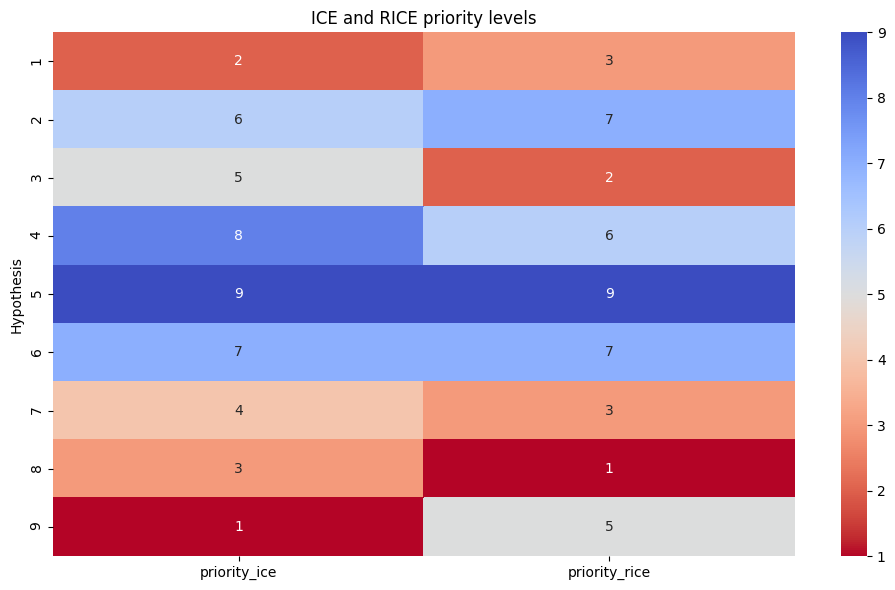

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Niveles de prioridad con el método 'rank()'
hypothesis['priority_ice'] = hypothesis['ice'].rank(ascending=False, method='min').astype(int)
hypothesis['priority_rice'] = hypothesis['rice'].rank(ascending=False, method='min').astype(int)

# Datos necesarios para el mapa de calor.
priority = hypothesis[['n_hypothesis', 'priority_ice', 'priority_rice']].set_index('n_hypothesis')

# Mapa de calor con colores invertidos.
plt.figure(figsize=(10, 6))
sns.heatmap(priority, annot=True, cmap='coolwarm_r', cbar=True)
plt.title('ICE and RICE priority levels')
plt.ylabel('Hypothesis')
plt.tight_layout()
plt.show()


Las hipótesis números 8 y 3 lideran la priorización ahora el que alcance entra en juego con __RICE__. 

La hipótesis número 9, que con base en __ICE__ era la más prioritaria, baja hasta el quinto lugar de prioridad según __RICE__. Esto se debe a que su puntuación en alcance es de 1. 

La quinta hipótesis fue en ambos casos la menos prioritaria.

Una hipótesis puede tener asegurado un gran impacto y ser de fácil implementación, pero si su alcance es mínimo ¿sigue siendo una prioridad estratégica? Eso dependerá del framework utilizado. Considero que __RICE__ es la mejor opción, ya que el alcance es una variable fundamental para toda tienda online.

## Parte 2: análisis del test A/B
Antes de comenzar el análisis del test A/B  vamos a familiarizarnos con los archivos de transacciones y visitas. Los almacenaremos en las variables ``orders`` y ``visits`` respectivamente. Comenzaremos un breve análisis exploratorio.

In [6]:
# Cargamos la información.
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Imprimimos 'orders' y 'visits' y vemos su información.
display(orders.head(5))
display(visits.head(5))
print()
print(orders.info())
print()
print(visits.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Ninguna de las tablas tiene datos nulos. Voy a estandarizar los nombres de las columnas a la convención __snake_case__ y a cambiar los tipos de datos de algunas de las columnas. Empecemos con ``orders``.

In [7]:
# No veo necesario hacer un ciclo for o usar la biblioteca 're'. Son pocas columnas. Haremos el cambio con el atributo 'columns' y una lista. Fácil. 
orders.columns = [
    'transaction_id',
    'visitor_id',
    'date',
    'revenue',
    'group']

# Modificación de los tipos de datos de las columnas.
# Cambiar 'transaction_id' y 'visitor_id' a string.
orders[['transaction_id', 'visitor_id']] = orders[['transaction_id', 'visitor_id']].astype('object')

# Cambio de la columna date a datetime.
orders['date'] = pd.to_datetime(orders['date'])

# Comprobaciones.
print('información de las nuevas columnas:', orders.columns)
print()
orders.info()

información de las nuevas columnas: Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   object        
 1   visitor_id      1197 non-null   object        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.9+ KB


Los identificadores de transacción y usuario, así como el grupo, ya son cadenas de texto. La fecha ya es de tipo 'datetime'. Los tipos de datos del DataFrame ``orders`` ya están listos. 

Continuemos con el DataFrame ``visits``. Éste solo necesita que los datos de la columna ``'date'`` sean de tipo 'datetime'.

In [8]:
# Cambio de la columna date a datetime.
visits['date'] = pd.to_datetime(visits['date'])

# Comprobación
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Cuando se trata del tipo de datos, ambas tablas están están correctas.

Como paso final del análisis exploratorio debemos comprobar que no haya visitantes repetidos en cada muestra. Las muestras de una prueba A/B deberían ser independientes.

In [9]:
# Obtenemos los visitantes del grupo A y del grupo B al filtrarlos.
a_visitors = orders[orders['group'] == 'A']['visitor_id']
b_visitors = orders[orders['group'] == 'B']['visitor_id']

# Encontramos los visitantes que están en ambos grupos.
duplicate_visitors = a_visitors[a_visitors.isin(b_visitors)].unique()

# Impresión de los resultados
print(f"Tenemos un total de {len(duplicate_visitors)} visitantes en ambos grupos.")

Tenemos un total de 58 visitantes en ambos grupos.


Tenemos visitantes en ambos grupos. Como se supone que las muestras sean independientes debemos eliminarlos. Crearemos una nueva variable con la información correcta y usaremos el método ``copy()``, recomendado al trabajar con subconjuntos de datos.

In [10]:
# Eliminación de los registros de usuarios duplicados en una nueva variable. 
orders_clean = orders[~orders['visitor_id'].isin(duplicate_visitors)].copy()

# Impresión de resultados.
print(f"Filas originales: {orders.shape[0]}")
print(f"Filas después de limpiar: {orders_clean.shape[0]}")
print(f"Se eliminaron {orders.shape[0] - orders_clean.shape[0]} registros por visitantes duplicados.")


Filas originales: 1197
Filas después de limpiar: 1016
Se eliminaron 181 registros por visitantes duplicados.


A partir de ahora, trabajaremos con la información de ``orders_clean``, el DataFrame sin usuarios duplicados.

### Ejercicios
#### 1. Representación gráfica del ingreso acumulado por grupo
Para saber el ingreso acumulado por grupo debemos agrupar con base en la fecha y grupo, y sumar los valores de la columna ``'revenue'``. Con esa información podemos hacer la suma acumulada.

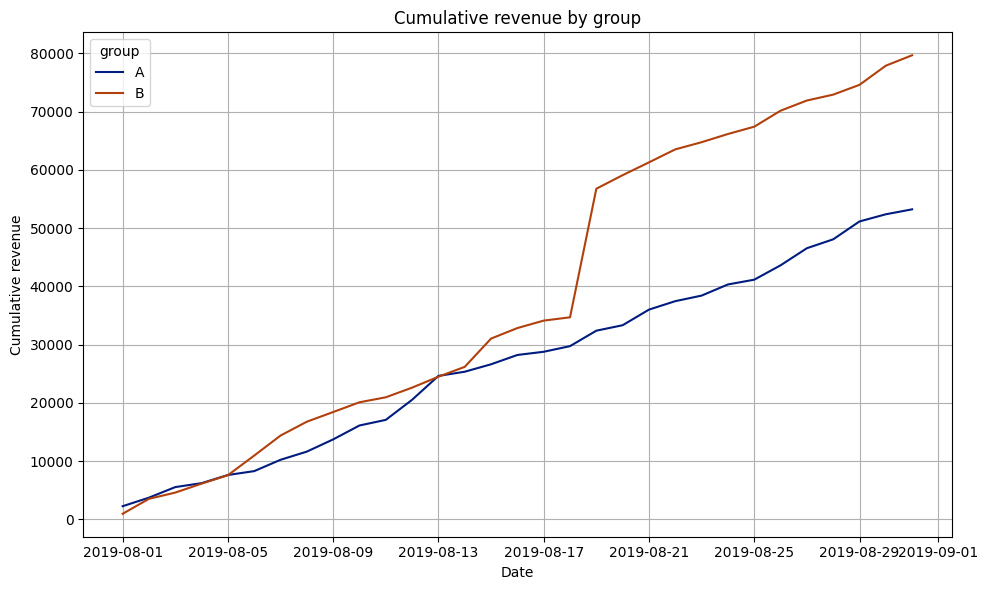

In [11]:
# Agrupación con base en fecha y grupo, además de la suma de los ingresos.
daily_revenue = orders_clean.groupby(['date', 'group']).agg({'revenue': 'sum'}).reset_index()

# Ahora podemos hacer la suma acumulada. Sólo debemos distinguir entre grupos usando 'groupby()'.
daily_revenue['cumulative_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()

# Grafica de líneas con seaborn.
import seaborn as sns
sns.set_palette('dark')

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=daily_revenue,
    x='date',
    y='cumulative_revenue',
    hue='group'
)
plt.title('Cumulative revenue by group')
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.grid(True)
plt.tight_layout()
plt.show()



##### Conclusión y conjeturas
A los pocos días del comienzo de la prueba el ingreso acumulado del grupo B fue mayor, para ser el mismo que el del grupo A casi a la mitad de la prueba. En la segunda mitad de la prueba el ingreso acumulado del grupo B fue mayor. Llama la atención que en la gráfica hay una fluctuación muy grande del día 18 de agosto al día 19 de agosto. ¿Qué pasó ese día? Probablemente tengamos como outliers compras únicas de un revenue muy grande.  

#### 2. Representación gráfica del tamaño de pedido promedio acumulado por grupo con conclusiones y conjeturas.
Necesitamos el promedio diario para después calcular el promedio diario acumulado. Primero calcularemos los ingresos y el número de pedidos, después los acumulados y finalmente el promedio medio acumulado.

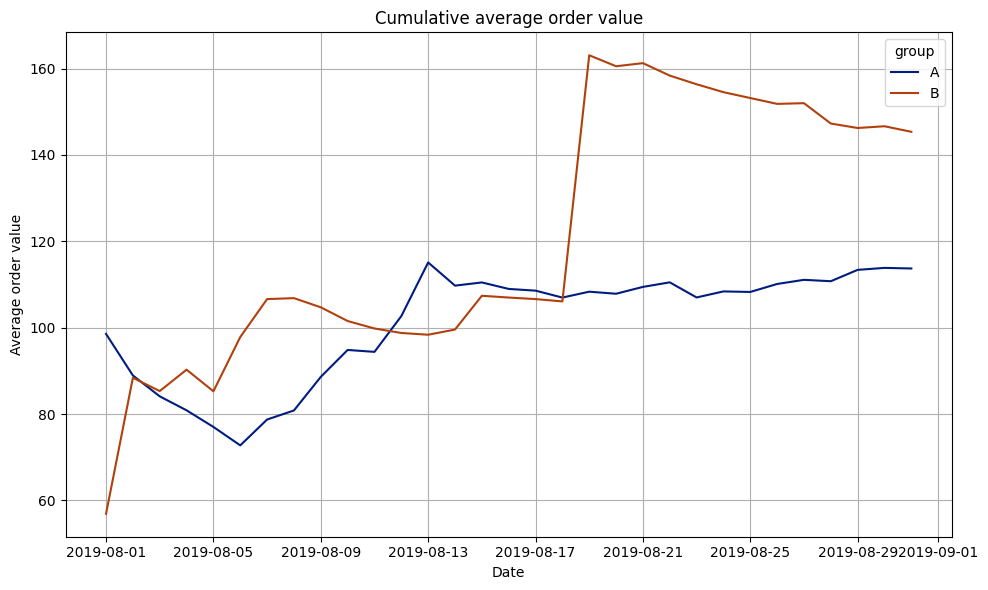

In [12]:
# Cálculo de los ingresos y el número de pedidos.
daily_metrics = orders_clean.groupby(['date', 'group']).agg(revenue = ('revenue', 'sum'), orders = ('transaction_id', 'nunique')).reset_index()

# Cálculo de los acumulados por grupo. 
daily_metrics['revenue_cumsum'] = daily_metrics.groupby('group')['revenue'].cumsum()
daily_metrics['orders_cumsum'] = daily_metrics.groupby('group')['orders'].cumsum()

# Cálculo del promedio acumulado.
daily_metrics['avg_order_value_cumsum'] = daily_metrics['revenue_cumsum'] / daily_metrics['orders_cumsum']

# Visualización.
import seaborn as sns
sns.set_palette('dark')

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=daily_metrics,
    x='date',
    y='avg_order_value_cumsum',
    hue='group'
)
plt.title('Cumulative average order value')
plt.xlabel('Date')
plt.ylabel('Average order value')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Conclusión y conjeturas
Como veíamos en la gráfica del ingreso acumulado, hay cambios bruscos que podrían deberse a valores atípicos. El salto se aprecia en las mismas fechas. El grupo B mantuvo un promedio por pedido acumulado mayor, pero __este resultado parece estar influido por 'outliers'__.

#### 3. Representación gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A
Con la información contenida en ``daily_metrics`` podemos calcular la diferencia relativa del grupo B sobre A. La fórmula sería:

$$
\text{Relación acumulada} = \frac{\text{AvgOrderValue}_B}{\text{AvgOrderValue}_A} - 1
$$


group               A          B
date                            
2019-08-01  98.547826  56.894118
2019-08-02  88.926190  88.382500
2019-08-03  84.092424  85.312963
2019-08-04  80.851948  90.272059
2019-08-05  77.006061  85.256180


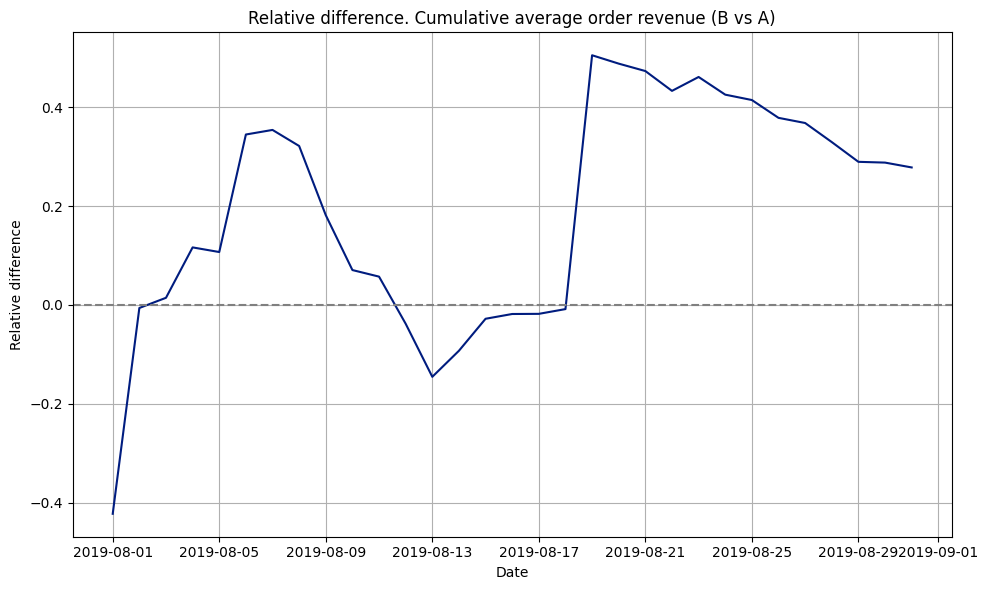

In [13]:
# Vamos a pivotear 'daily_metrics'. Como índice tendremos las fechas, las columnas serán cada grupo y los valores el tamaño promedio acumulado por grupo.
avg_cumsum_pivot = daily_metrics.pivot(index='date', columns='group', values='avg_order_value_cumsum')
print(avg_cumsum_pivot.head())

# En una nueva columna vamos a almacenar la diferencia relativa.
avg_cumsum_pivot['relative_difference'] = (avg_cumsum_pivot['B'] / avg_cumsum_pivot['A']) - 1

# Graficamos.
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_cumsum_pivot['relative_difference'])
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Relative difference. Cumulative average order revenue (B vs A)')
plt.xlabel('Date')
plt.ylabel('Relative difference')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Conclusión y conjeturas
En las últimas dos semanas de la prueba la diferencia relativa disminuyó poco a poco. Esto mantiene presente la sospecha de que las ventas del grupo B están fuertemente afectadas por 'outliers' que nos están otorgando información poco confiable. A pesar de que el grupo B demuestre hasta este punto una gran ventaja sobre A en todas nuestras gráficas, __aún no podemos concluir que la prueba haya sido exitosa__. 

#### 4. Cálculo y gráfica de la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día 
Para calcular a tasa de conversión diaria necesitamos agrupar con base en fecha y grupo y calcular la cantidad de órdenes únicas. Con esa información podemos unir esta nueva tabla a 'visits'. Ventas y visitas, todo lo necesarios para calcular conversión.

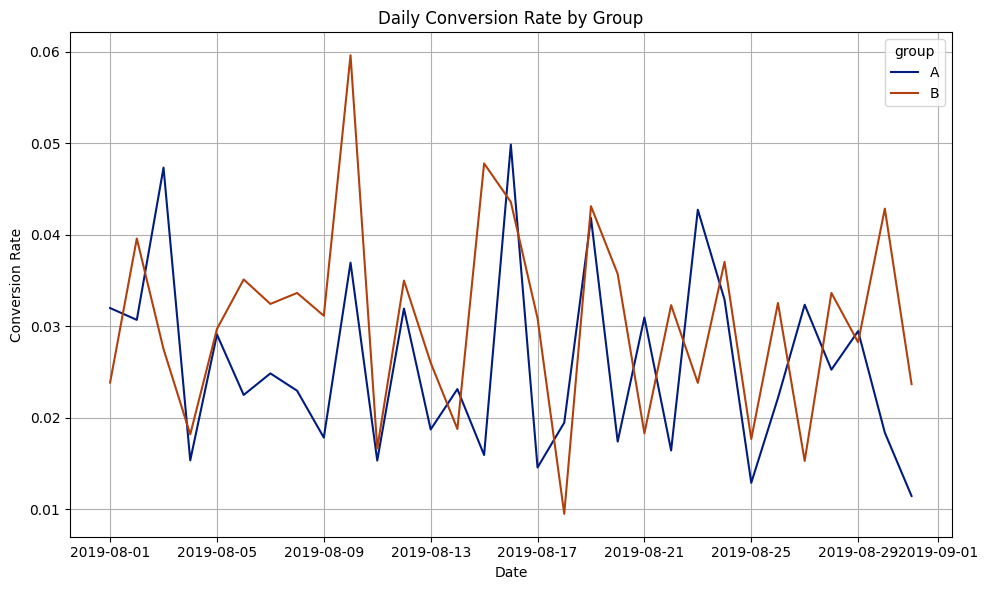

In [14]:
# Calculemos de nuevo la cantidad de órdenes por fecha y grupo.
orders_per_day = orders_clean.groupby(['date', 'group']).agg(orders=('transaction_id', 'nunique')).reset_index()

# Las visitas están contenidas en la tabla 'visits'. Vamos a unirla a tabla 'orders_per_day'.
daily_data = visits.merge(orders_per_day, on=['date', 'group'], how='left')

# Cálculo de la tasa de conversión.
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']

# Visualización.
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=daily_data,
    x='date',
    y='conversion_rate',
    hue='group'
)
plt.title('Daily Conversion Rate by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Conclusión y conjeturas
Cuando hablamos de conversión diaria para cada grupo, podemos observar que el patrón de superioridad del grupo B sigue visible, pero no es tan evidente como en gráficos anteriores. __Es difícil interpretar una gráfica como ésta ya que los resultados diarios varían mucho__.

#### 5. Gráfico de dispersión del número de pedidos por usuario
La información necesaria para saber el número de pedidos por usuario está contenida en ``orders_clean``. La agruparemos adecuadamente para obtener la información y después graficaremos. 

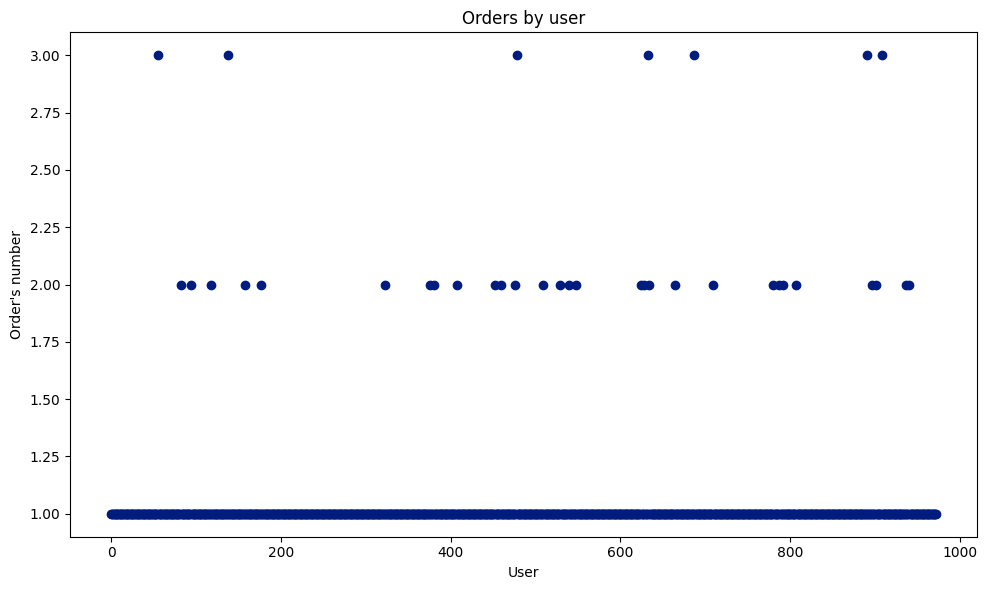

In [15]:
# Agrupar por usuario y contar la cantidad de pedidos
orders_by_user = orders_clean.groupby('visitor_id').agg(orders=('transaction_id', 'nunique')).reset_index()

# Visualización
x_values = range(len(orders_by_user))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_by_user['orders'])
plt.title('Orders by user')
plt.xlabel('User')
plt.ylabel("Order's number")
plt.tight_layout()
plt.show()



##### Conclusión y conjeturas
Como sugerían los promedios de conversión diaria y los tamaños acumulados promedio de las órdenes, hay 'outliers', pero nada muy extremo o anormal. ¿Será que los 'outliers' más disruptivos están en el tamaño de compra?

La gran mayoría de usuarios parece hacer una sola orden. Al parecer un número de órdenes inusual sería a partir de dos órdenes; vamos a comprobarlo con los percentiles. 

#### 6. Cálculo de los percentiles 95 y 99 del número de pedidos por usuario

In [16]:
# Para obtener percentiles necesitaremos importar 'numpy'.
import numpy as np

# Cálculo de percentiles para el número de pedidos por usuario.
print('Éstos son los percentiles 95, 99:', np.percentile(orders_by_user['orders'], [95, 99]))
print()

# Usuarios que hicieron más de dos y tres pedidos.
abnormal_users_2 = orders_by_user[orders_by_user['orders'] > 1]
abnormal_users_3 = orders_by_user[orders_by_user['orders'] > 2]

# Impresiones para poner los datos en perspectiva.
print(f'El número de usuarios fue de {len(orders_by_user)}.')
print()
print(f'De esos 973 usuarios, {len(abnormal_users_2)} hicieron más de una compra.')
print()
print(f'Solamente {len(abnormal_users_3)} hicieron más de dos compras.')


Éstos son los percentiles 95, 99: [1. 2.]

El número de usuarios fue de 973.

De esos 973 usuarios, 36 hicieron más de una compra.

Solamente 7 hicieron más de dos compras.


##### Conclusión y conjeturas
Con base en los percentiles podemos concluir que los usuarios con más de una compra son inusuales y los que tienen más de dos compras son extremadamente insuales. El 'scatter plot' de la sección anterior estaba en lo correcto. Una gran mayoría de usuarios hace sólo una compra. Es por eso que __consideraremos como datos anómalos los que estén por encima del percentil 99__. Así evitaremos que esos pocos casos atípicos distorcionen la información de las compras. Si tuviéramos mucho 'outliers' usaríamos como filtro el percentil 95.

#### 7. Gráfico de dispersión de los precios de los pedidos
La información necesaria para graficar los precios de los pedidos está en la tabla ``orders_clean``.

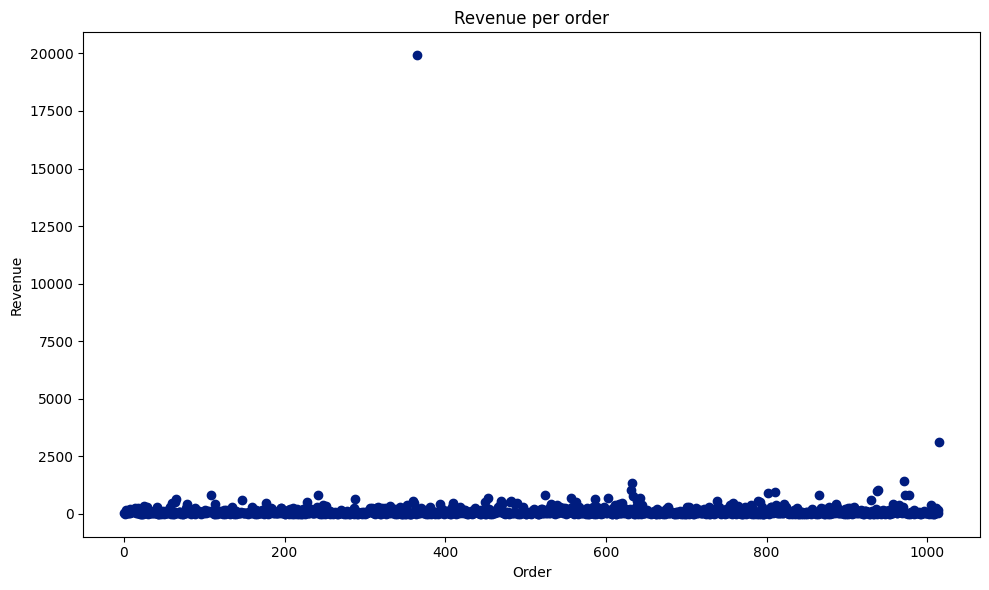

In [17]:
# Visualización del precio de cada pedido
x_values = range(len(orders_clean))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_clean['revenue'])
plt.title('Revenue per order')
plt.xlabel('Order')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


In [18]:
# Impresión de las cinco compras con el revenue más alto.
display(orders_clean['revenue'].sort_values( ascending = False).head(5))

425     19920.4
1196     3120.1
1136     1425.8
744      1335.6
743      1050.0
Name: revenue, dtype: float64

##### Conclusión y conjeturas
Ya podemos ver los 'outliers' que provocaban fluctuaciones en algunas de nuestras gráficas anteriores. Podemos ver __una compra de $19,920__ completamente anormal que supera de manera exponencial el 'revenue' de cada orden. Se trate de un usuario completamente fuera de lo normal o de un error en la página web, debemos eliminarlo de nuestro DataFrame. 

Veamos que tan anormales son los 'outliers' apoyados del cálculo de percentiles. 

#### 8. Cálculo de los percentiles 95 y 99 de los precios de los pedidos

In [19]:
# Cálculo de percentiles para el precio de los pedidos.
print('Estos son los percentiles 95 y 99 de los precios de los pedidos:', np.percentile(orders_clean['revenue'], 95), 'y', np.percentile(orders_clean['revenue'], 99))
print()

# Filtrado de pedidos con ingresos considerados anómalos.
abnormal_revenue_95 = orders_clean[orders_clean['revenue'] > np.percentile(orders_clean['revenue'], 95)]
abnormal_revenue_99 = orders_clean[orders_clean['revenue'] > np.percentile(orders_clean['revenue'], 99)]

# Impresiones para entender el contexto.
print(f'El número total de pedidos fue de {len(orders_clean)}.')
print()
print(f"{len(abnormal_revenue_95)} pedidos superan el percentil 95, que fue de {np.percentile(orders_clean['revenue'], 95)}.")
print()
print(f"{len(abnormal_revenue_99)} pedidos superan el percentil 99, que fue de {np.percentile(orders_clean['revenue'], 99)}.")

Estos son los percentiles 95 y 99 de los precios de los pedidos: 414.275 y 830.3

El número total de pedidos fue de 1016.

51 pedidos superan el percentil 95, que fue de 414.275.

9 pedidos superan el percentil 99, que fue de 830.3.


##### Conclusión y conjeturas
Cada vez nos queda más claro que los 'outliers' del precio del pedido son verdaderamente anormales. En este caso, al igual que con el número de compras, los pedidos que superan el percentil 99 serán el límite. Esto se debe a que el número de 'outliers' es bajo. __Cualquier pedido por encima de $830.30 se considerará una anomalía.__ 

#### 9. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto
Para comprobar la significancia de la diferencia en la conversión entre los grupos A/B necesito una herramienta que me ayude a probar hipótesis acerca de la igualdad de __proporciones__.  Haré uso del estadístico ``Z``. Este estadístico indica a cuántas desviaciones estándar se encuentra un valor específico de datos de la media de una distribución. Así podremos saber si se puede sacar una conclusión sobre la diferencia entre las tasas de conversión. 

In [20]:
# Importamos 'scipy.stats' y 'math'.
from scipy import stats as st
import math as mth

# Nuestro nivel de significación.
alpha = 0.05

# Usuarios que hicieron al menos un pedido por grupo. La información está en 'orders_clean'. Organizamos por grupo y seleccionamos identificadores únicos.
# Así tenemos una tabla con los usuarios únicos por grupo.
conversion_counts = orders_clean.groupby('group')['visitor_id'].nunique()

# Cuenta del número de visitantes. Organizamos por grupo y simplemente contamos las visitas.
visitor_counts = visits.groupby('group')['visits'].sum()

# Creación de las variables de conversión y visitas con base en las dos tablas anteriores.
successes = np.array([conversion_counts['A'], conversion_counts['B']])
trials = np.array([visitor_counts['A'], visitor_counts['B']])

# Proporción de éxito en el primer grupo.
p1 = successes[0] / trials[0]

# Proporción de éxito en el segundo grupo.
p2 = successes[1] / trials[1]

# Proporción de éxito en el DataSet unido.
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# Diferencia de propociones de los datasets.
difference = p1 - p2

# Estadística en desviaciones estándar de la distribución normal estándar.
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

# Distribución normal estándar (media 0, desviación estándar 1).
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print(f'Número de conversiones: grupo A = {successes[0]}, grupo B = {successes[1]}.')
print(f'Número de visitantes: grupo A = {trials[0]}, grupo B = {trials[1]}.')
print()
print('p-value:', p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las tasas de conversión.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente de diferencia en las tasas de conversión.")


Número de conversiones: grupo A = 445, grupo B = 528.
Número de visitantes: grupo A = 18736, grupo B = 18916.

p-value: 0.01093208956553604
Rechazamos la hipótesis nula: hay una diferencia significativa en las tasas de conversión.


##### Conclusión y conjeturas
__Con los datos en bruto la diferencia entre las proporciones de conversión es estadísticamente significativa__ y podría deberse a algo más que el simple azar. ¿Será lo mismo con los datos filtrados? Antes de saberlo, veremos la significancia estadística  del tamaño promedio de pedido con los datos en bruto.

#### 10. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto
A diferencia de la conversión, el tamaño promedio de pedido es una variable continua. Además sabemos que hay 'outliers' gracias a nuestros análisis de percentiles. Asumiremos no normalidad y aplicaremos el __test U de Mann-Whitney__.

In [21]:
# Filtremos las tablas con base en grupos para obtener el 'revenue' de cada grupo.
groupA_revenue = orders_clean[orders_clean['group'] == 'A']['revenue']
groupB_revenue = orders_clean[orders_clean['group'] == 'B']['revenue']

# Nuestro nivel de significación
alpha = 0.05

# El test Mann-Whitney.
results = st.mannwhitneyu(groupA_revenue, groupB_revenue)

# Resultados
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en el tamaño promedio de pedido.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.")


p-value: 0.8622329690015668
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


##### Conclusión y conjeturas
Interesante resultado. El análisis anterior de conversión con los datos en bruto afirmaba una diferencia. Algunas de las gráficas anteriores sugerían una diferencia considerable a favor del grupo B, pero al parecer es inexistente incluso con los datos en bruto cuando se trata del 'revenue' promedio. __Parece que cuando analicemos los datos sin 'outliers' obtendremos los mismos resultados__ y podremos confirmar con mayor certeza que no hay diferencias estadísticamente significativas entre los grupos. 

El test U de Mann-Whitney es considerado robusto ante muestras de este tamaño y 'outliers'. Sería sorprendente que con los datos filtrados obtengamos resultados diferentes. Si el valor p disminuye sería muestra de que los 'outliers' sí estaban distorsionando nuestros resultados.

#### 11. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

Como vimos, con los datos en bruto la diferencia entre las proporciones de conversión fue estadísticamente significativa. ¿Pero qué tal con los datos filtrados?

Como lo hicimos con los datos en bruto, también aplicaremos el __estadístico Z__. Necesitamos filtrar a los usuarios con un número de comprar mayor o igual al __percentil 99 (2 compras o más)__.

In [22]:
# Nivel de significación.
alpha = 0.05

# Filtrado por usuarios con dos o más pedidos.
orders_by_user = orders_clean.groupby('visitor_id').agg(orders=('transaction_id', 'nunique')).reset_index()
valid_users = orders_by_user[orders_by_user['orders'] <= 2]['visitor_id']

# Filtrado de pedidos con revenue igual o mayor al percentil 99.
revenue_99 = np.percentile(orders_clean['revenue'], 99)

# Nueva tabla filtrada con los datos (excluye a los datos de percentiles 99 y superiores).
filtered_orders = orders_clean[(orders_clean['visitor_id'].isin(valid_users)) & (orders_clean['revenue'] <= revenue_99)]

# Usuarios que hicieron al menos un pedido agrupados y de la tabla filtrada. 
conversion_counts_f = filtered_orders.groupby('group')['visitor_id'].nunique()

# Número total de visitantes (sin filtrar).
visitor_counts = visits.groupby('group')['visits'].sum()

# Intentos y éxitos. Las visitas y compras de los grupos ya filtrados.
successes_f = np.array([conversion_counts_f['A'], conversion_counts_f['B']])
trials = np.array([visitor_counts['A'], visitor_counts['B']])

# Proporción de éxito en el primer grupo.
p1 = successes_f[0] / trials[0]

# Proporción de éxito en el segundo grupo.
p2 = successes_f[1] / trials[1]

# Proporción de éxito en el DataFrame unido.
p_combined = (successes_f[0] + successes_f[1]) / (trials[0] + trials[1])

# Diferencia entre las proporciones de los datasets.
difference = p1 - p2

# Cálculo del estadístico Z.
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

# Distribución normal estándar (media 0, desviación estándar 1).
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

# Mostrar resultados
print(f'Número de conversiones (filtradas): grupo A = {successes_f[0]}, grupo B = {successes_f[1]}.')
print(f'Número de visitantes: grupo A = {trials[0]}, grupo B = {trials[1]}.')
print(f'p-value: {p_value}.')

if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las tasas de conversión (datos filtrados).")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia de diferencia significativa.")


Número de conversiones (filtradas): grupo A = 435, grupo B = 522.
Número de visitantes: grupo A = 18736, grupo B = 18916.
p-value: 0.0069554215363445415.
Rechazamos la hipótesis nula: hay una diferencia significativa en las tasas de conversión (datos filtrados).


##### Conclusión y conjeturas
__El resultado es el mismo incluso con los datos filtrados__. Hay una diferencia significativa en las tasas de conversión. El valor p ha disminuido tras eliminar 'outliers', lo que confirma que los datos extremos distorsionaban nuestros resultados. Filtrar los datos nos ha ayudado a reafirmar nuestro resultado. Además el valor p ha sido pequeño en ambos casos.

#### 12. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados
Veamos si podemos reafirmar los resultados obtenidos con el DataFrame y su información en bruto cuando del tamaño promedio de pedido se trata.

In [23]:
# Nivel de significación
alpha = 0.05

# Muestras filtradas por grupo.
groupA = filtered_orders[filtered_orders['group'] == 'A']['revenue']
groupB = filtered_orders[filtered_orders['group'] == 'B']['revenue']

result = st.mannwhitneyu(groupA, groupB)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en el tamaño promedio del pedido (datos filtrados).")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia de diferencia en el tamaño promedio del pedido (datos filtrados).")


p-value: 0.8220253140355853
No se puede rechazar la hipótesis nula: no hay evidencia de diferencia en el tamaño promedio del pedido (datos filtrados).


##### Conclusión y conjeturas
En efecto, hemos reafirmado el resultado obtenido con los datos en bruto: __no podemos rechazar la hipótesis nula__ cuando del tamaño promedio de pedidos se trata. Además tenemos valores p altos en ambas pruebas. 

__Al principio de la prueba, los 'outliers' nos mostraron grandes fluctuaciones__ al calcular métricas como el ingreso acumulado, el tamaño de pedido acumulado y la diferencia relativa del tamaño de pedido. Parecía que los datos apuntaban a una diferencia favorable del grupo B sobre el A (hablando del tamaño del 'revenue'), pero las pruebas de la significancia estadística de la diferencia en el tamaño promedio indican que no con datos en bruto y filtrados.

#### 13. Decisión final
Después de las pruebas sabemos que hay una diferencia estadísticamente significativa entre el número de pedidos promedio, pero no cuando se trata del 'revenue' promedio por orden. En el proyecto no se indicó si la prioridad de la prueba era aumentar la conversión, el 'revenue' promedio de cada compra o ambos. Así que partiremos del supuesto que la página web simplemente quería mayores ingresos.

__La decisión basada en los resultados es parar la prueba y considerar al grupo B como el grupo líder__. Si bien el importe promedio es igual, el grupo B convierte a más usuarios. Y una mayor conversión es sinónimo de más ingresos aunque el precio de la compra promedio sea el mismo. __El grupo B genera mayores ingresos__.